# Impact parameter signage

The goal of this study is to observe how flipping the sign of the impact parameter changes the properties of muons in flavoured jets, including the value of the SMT algorithm. The impact parameter is positive (negative) if the distance of closest approach is in front of (behind) the beam line with respect to the associated jet.

In [1]:
import glob
import numpy as np
import pandas as pd
from root_numpy import root2array

GeV = 1000

In [2]:
def flatten(column):
    try:
        return np.array([var for entry in column for var in entry])
    except (TypeError, ValueError):
        return column

See cell below for all initial cuts made on jets and muons. Later cuts were made on jet flavour, the identity of the muon parent, and the sign of muon $d_0$ and $z_0$.

In [3]:
def applyCutsAndCorrectSign(f):
    nf = f[
        #Nicole's jet cuts
        (f.jet_pt > 20*GeV) &

        (abs(f.jet_eta) < 2.5) &
        ( (f.jet_pt > 60*GeV) | (abs(f.jet_eta) > 2.4) | (f.jet_JVT > 0.59) ) &

        #Muon cuts
        (f.jet_mu_pt > 1*GeV) &
        (abs(f.jet_mu_eta) < 2.5)
    ].copy()

    #Apply signage to muon d0 and z0
    nf.loc[:,"jet_mu_d0"] = abs(nf.loc[:,"jet_mu_d0"])*np.sign(np.sin(nf.loc[:,"jet_phi"] - nf.loc[:,"jet_mu_phi"])*nf.loc[:,"jet_mu_d0"])
    nf.loc[:,"jet_mu_z0"] = abs(nf.loc[:,"jet_mu_z0"])*np.sign((nf.loc[:,"jet_eta"] - nf.loc[:,"jet_mu_eta"])*nf.loc[:,"jet_mu_z0"])
    
    return nf

In [4]:
branchNames = [
    "jet_LabDr_HadF", 
    "jet_pt", "jet_eta", "jet_phi",
    "jet_JVT", 
    "jet_aliveAfterOR", "jet_aliveAfterORmu", 
    "jet_mu_smt",
    "jet_mu_pt", "jet_mu_eta", "jet_mu_phi",
    "jet_mu_pTrel", "jet_mu_dR",
    "jet_mu_d0", "jet_mu_z0",
    "jet_mu_parent_pdgid",
    "jet_mu_qOverPratio"
]

Ntuples from Rafael. The ntuples currently being used do not contain the track information or the $d_0$ or $z_0$ significance.

In [5]:
files = glob.glob("/gpfs/slac/atlas/fs1/d/rafaeltl/public/RNNIP/FTAG_ntups/user.bdong.perf-flavtag.mc16_13TeV.410470.ttbar_nonallhad.e6337_e5984_s3126_r10201_r10210_Akt4EMTo/*.root")
data = root2array(files[0], branches=branchNames)
print "Added ntuple #1"

for f in range(1,len(files)):
    data = np.hstack((data,root2array(files[f], branches=branchNames)))
    print "Added ntuple #{}".format(f+1)

Added ntuple #1
Added ntuple #2
Added ntuple #3


In [6]:
df = pd.DataFrame(data)

Flatten dataframe to jet level:

In [7]:
df = pd.DataFrame({k: flatten(c) for k, c in df.iteritems()})

Make jet/muon cuts shown above and correct the signs of $d_0$ and $z_0$ so that they are useful:

In [8]:
df = applyCutsAndCorrectSign(df)

Remove any rows that contain nan:

In [9]:
df = df.dropna()

In [10]:
from util import *
from plot import *

Muons from light-flavoured jets whose parent is pileup:

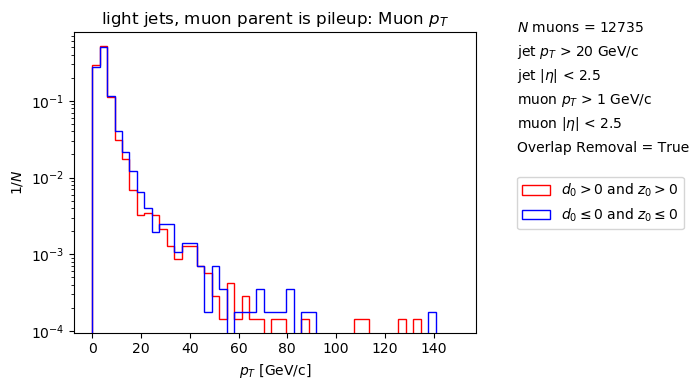

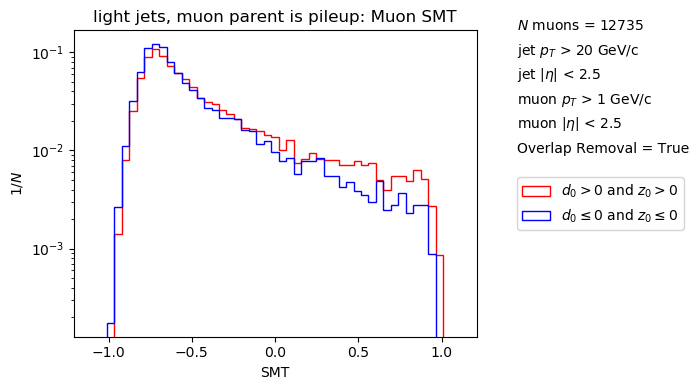

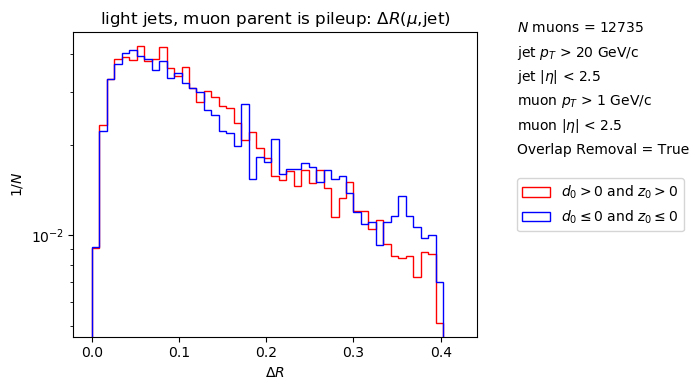

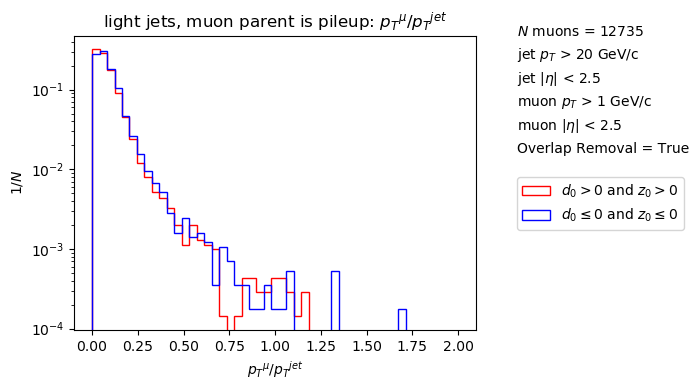

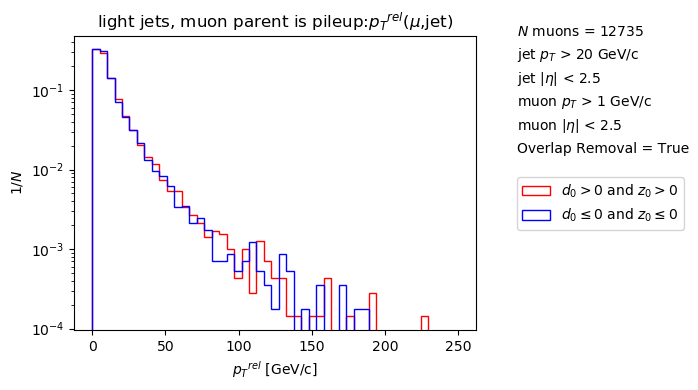

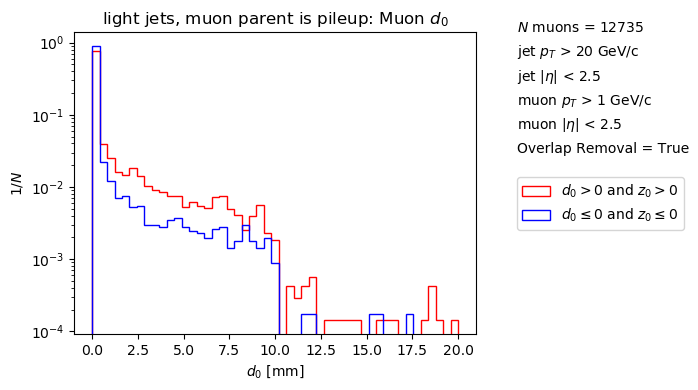

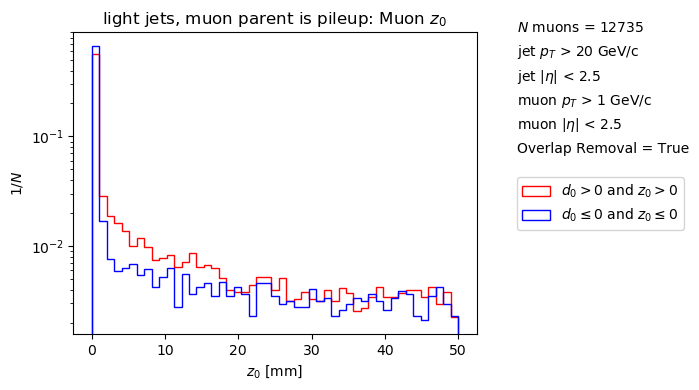

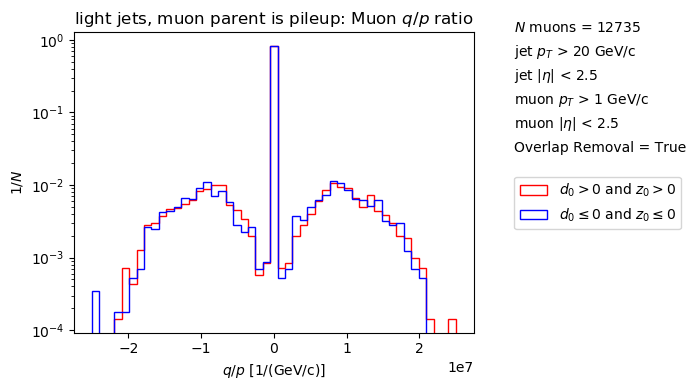

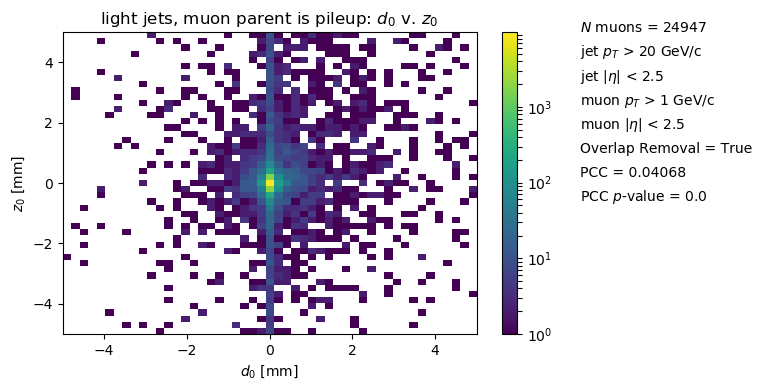

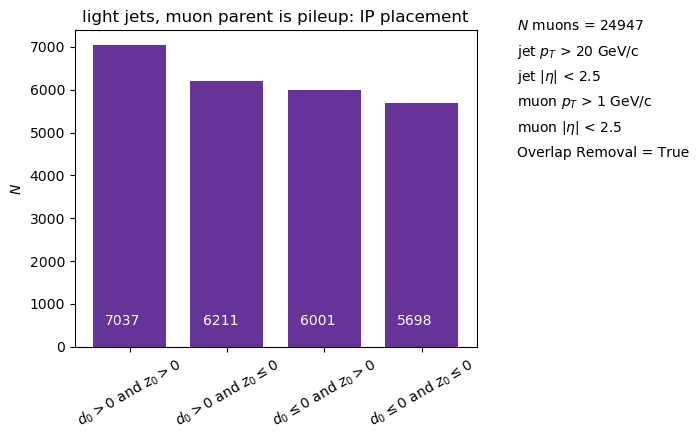

In [11]:
lightJetPileupPlots = makePlots(df, "light jets", "pileup")
printPlots(lightJetPileupPlots)

Muons from light-flavoured jets whose parent is a pion:

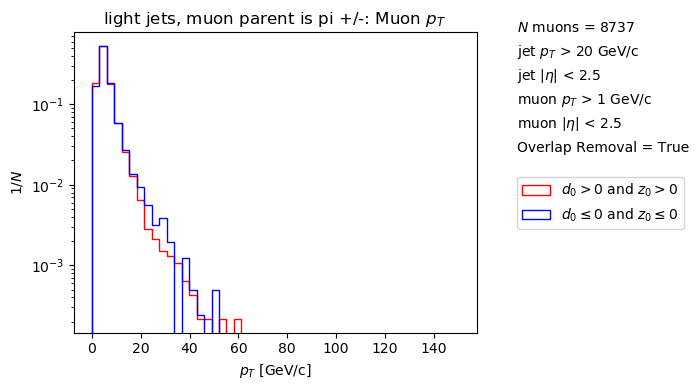

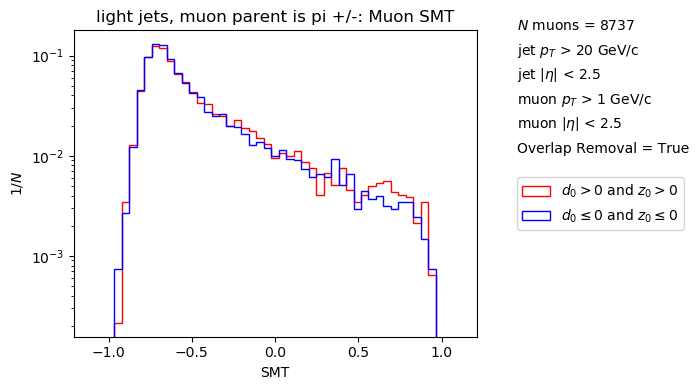

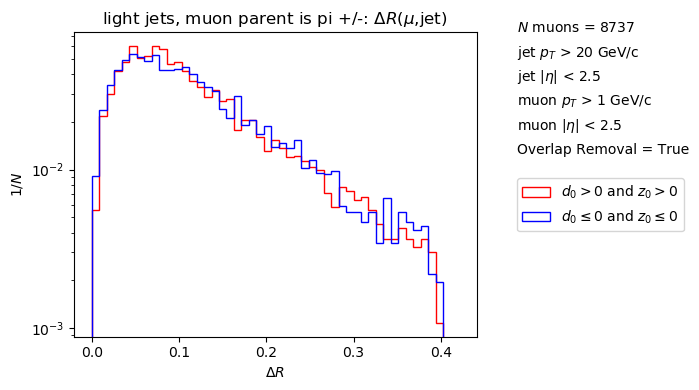

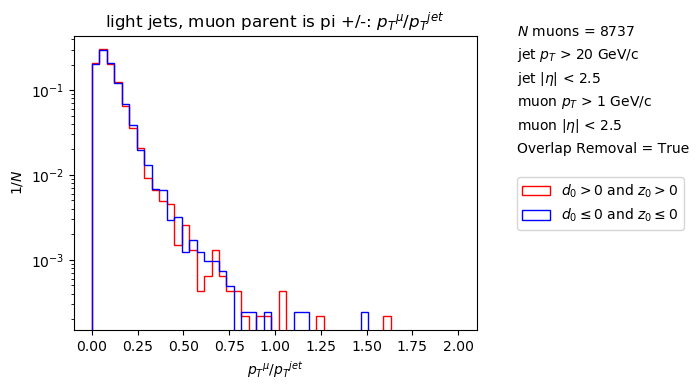

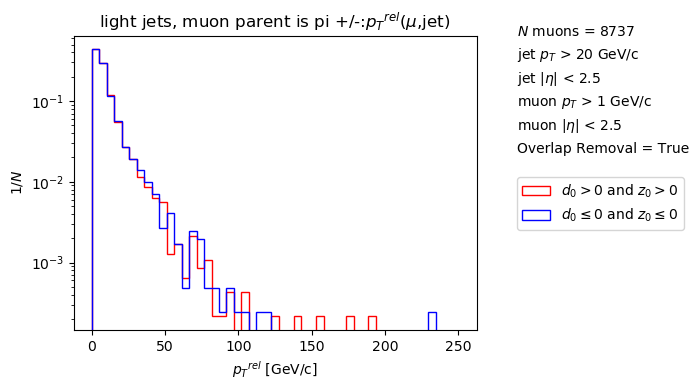

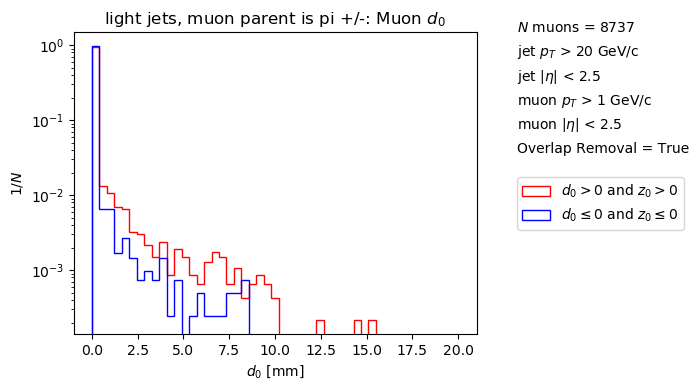

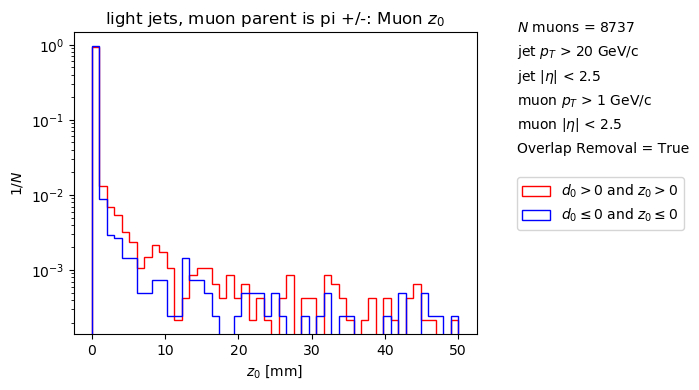

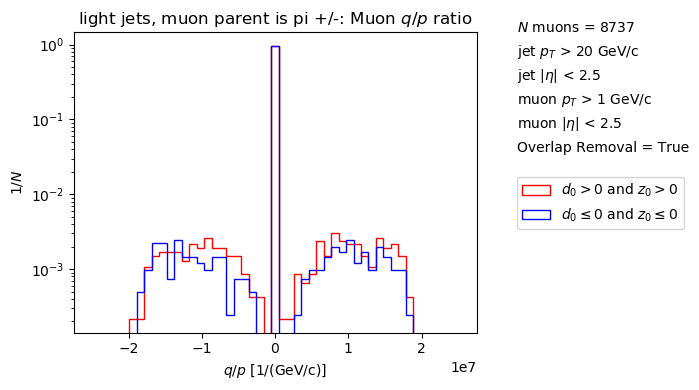

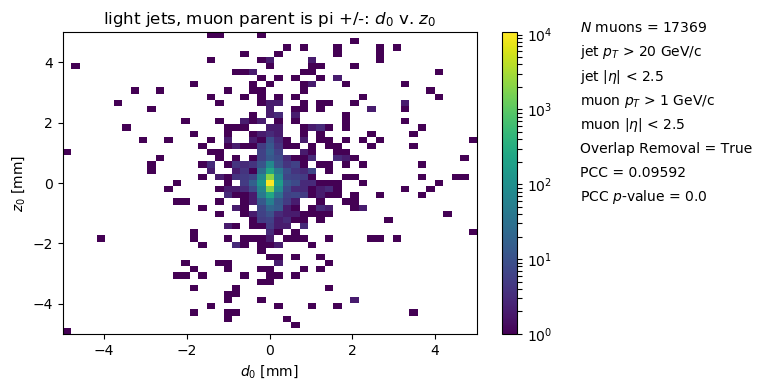

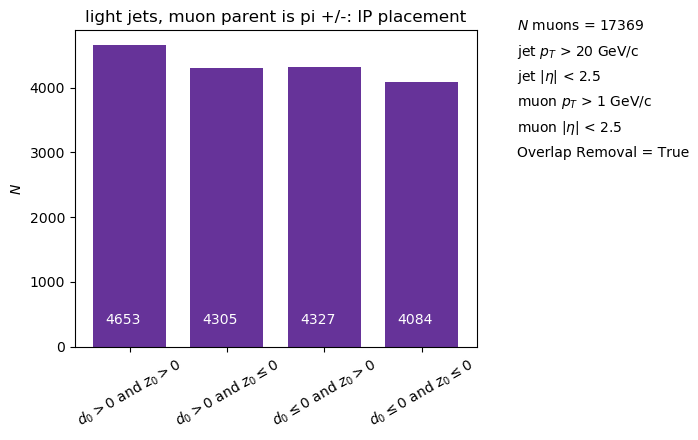

In [12]:
lightJetPiPlots = makePlots(df, "light jets", "pi +/-")
printPlots(lightJetPiPlots)

Muons from b-jets whose parent is a b hadron:

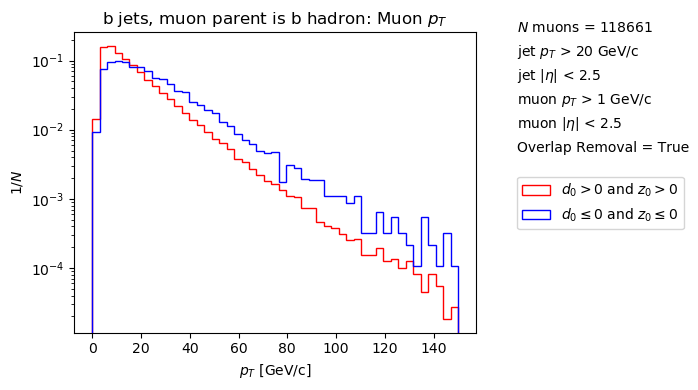

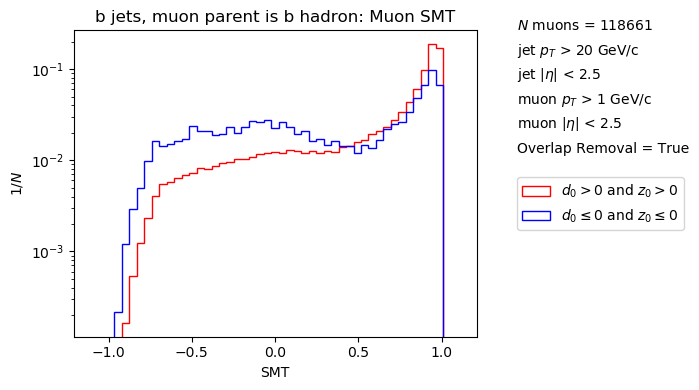

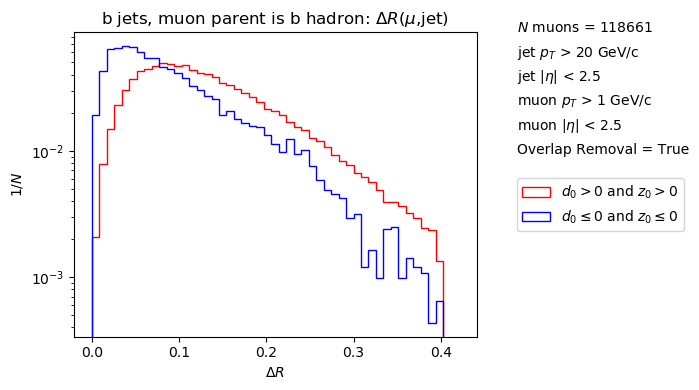

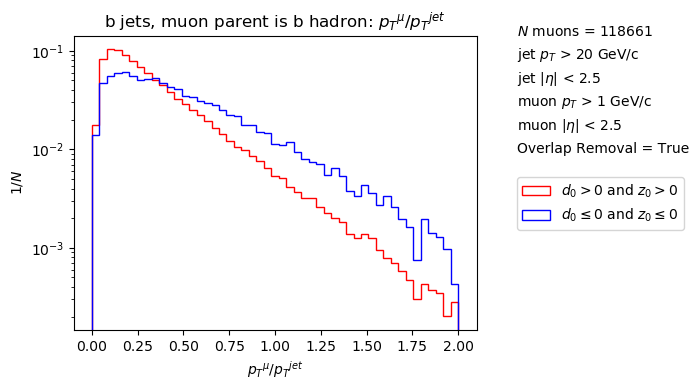

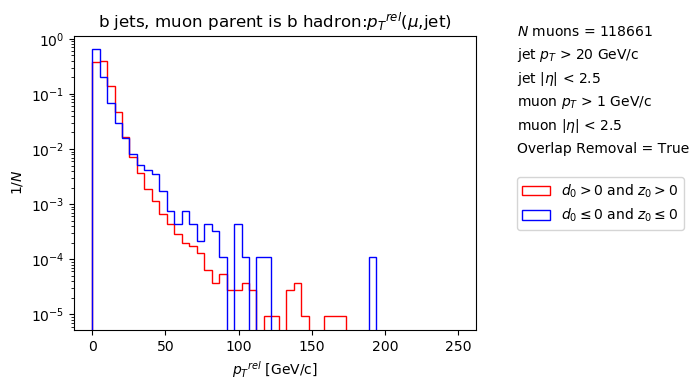

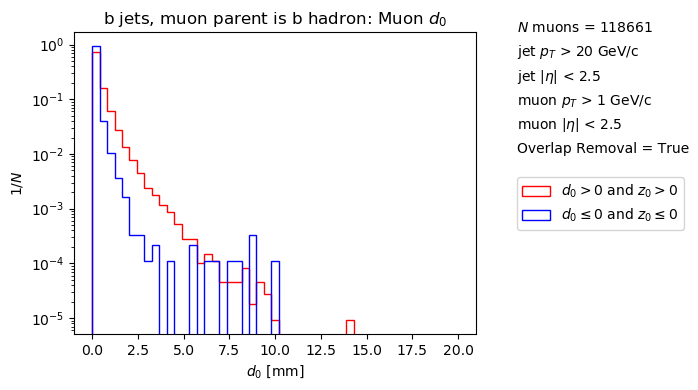

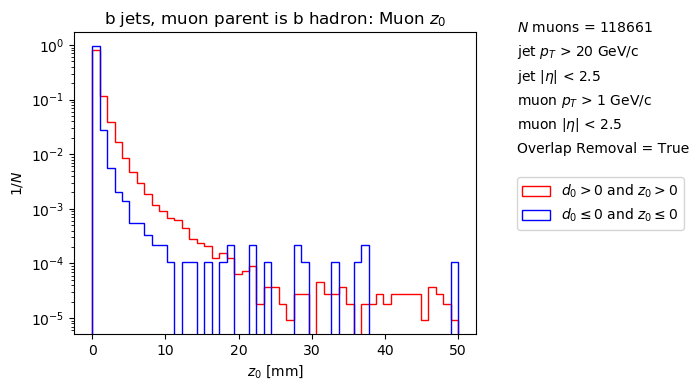

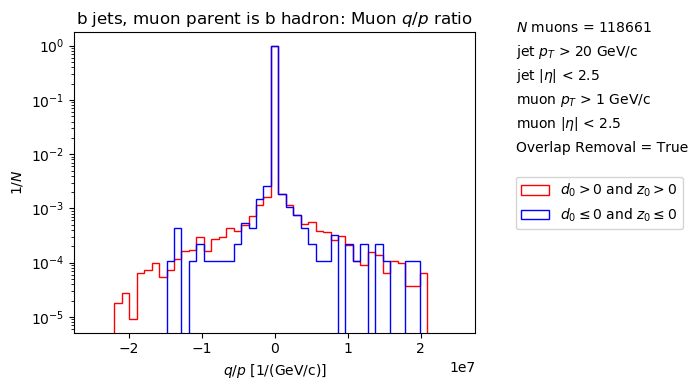

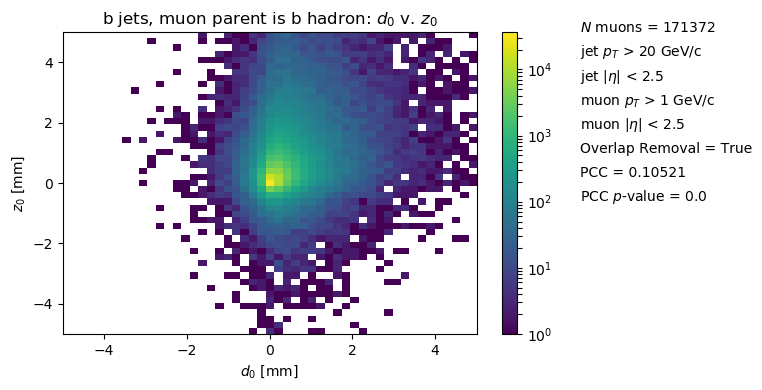

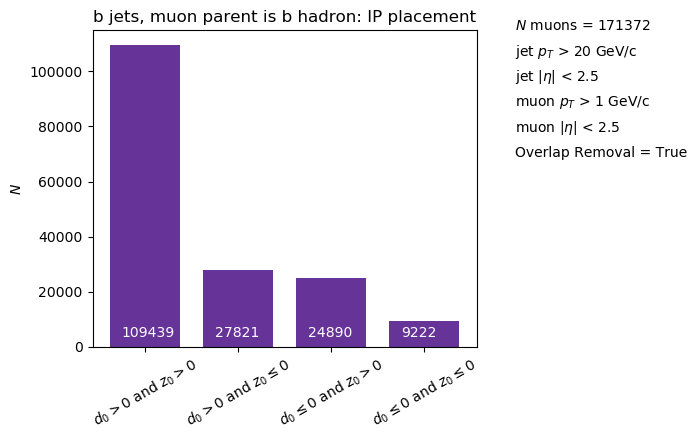

In [13]:
bJetPiPlots = makePlots(df, "b jets", "b hadron")
printPlots(bJetPiPlots)

Muons from b-jets whose parent is pileup:

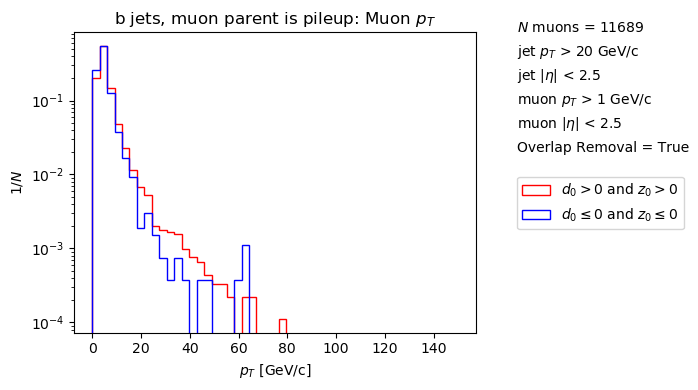

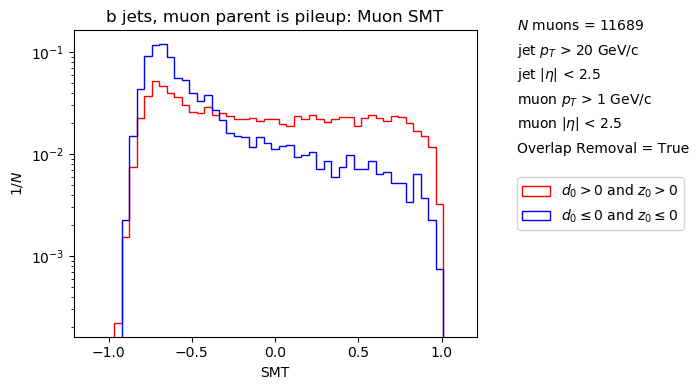

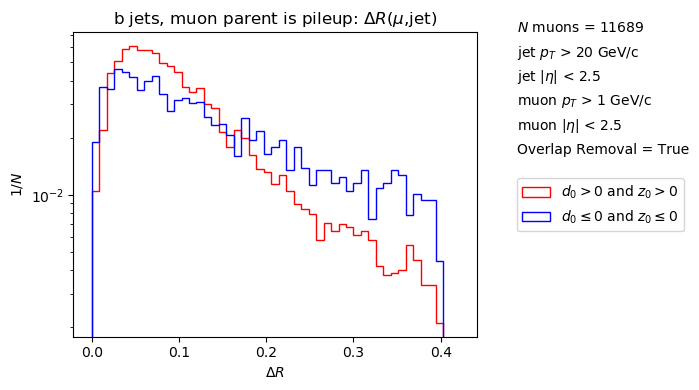

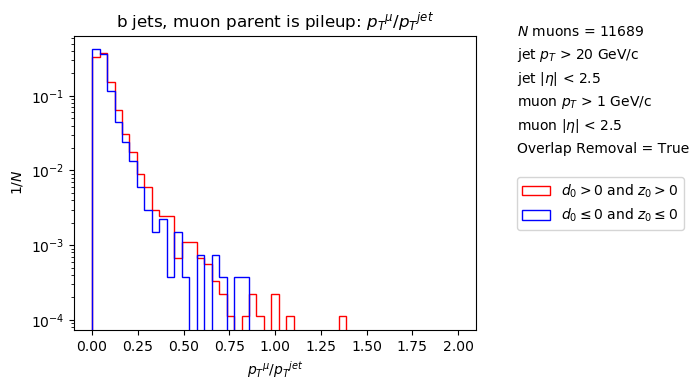

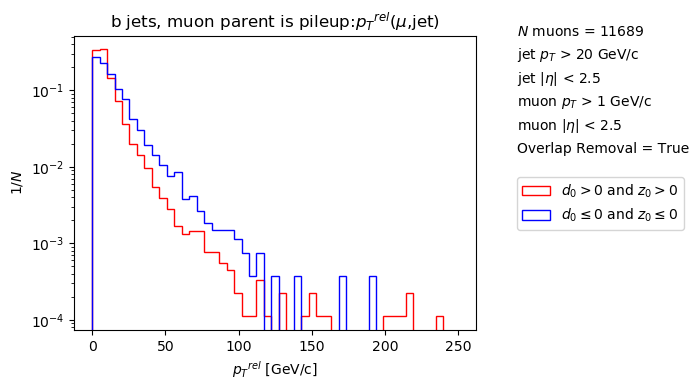

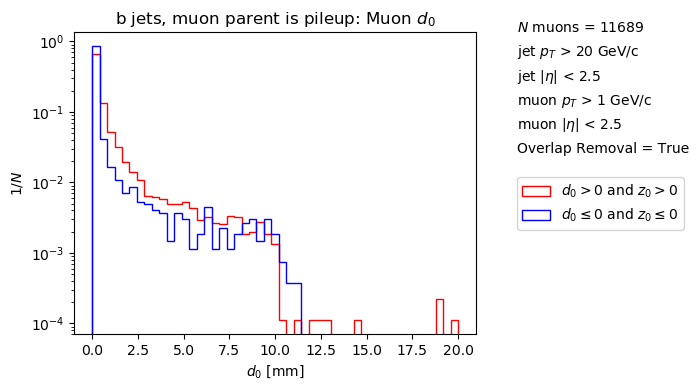

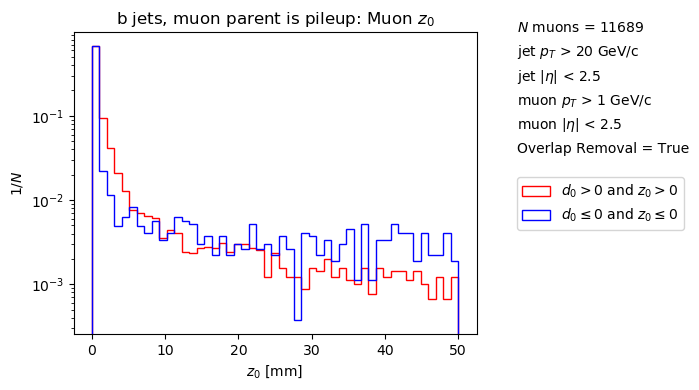

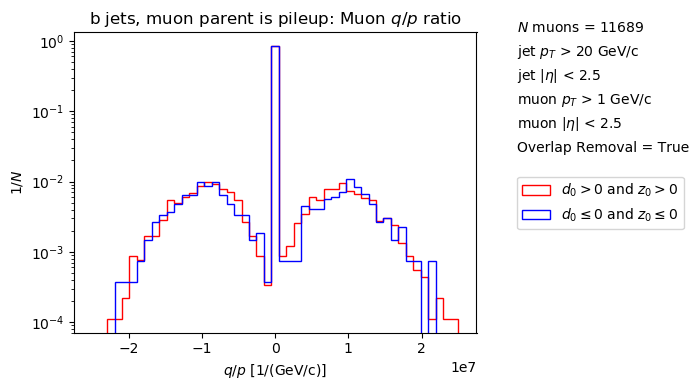

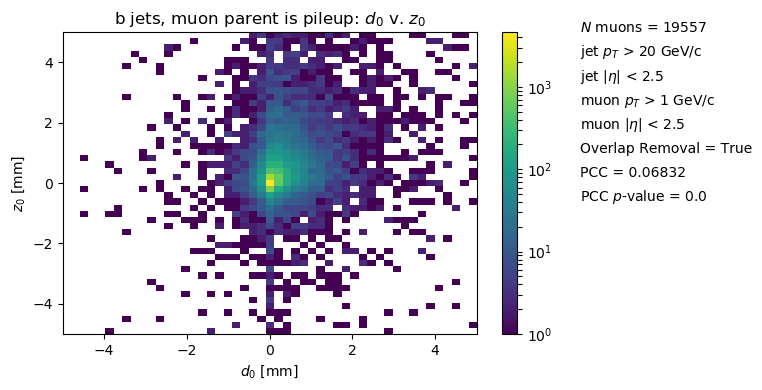

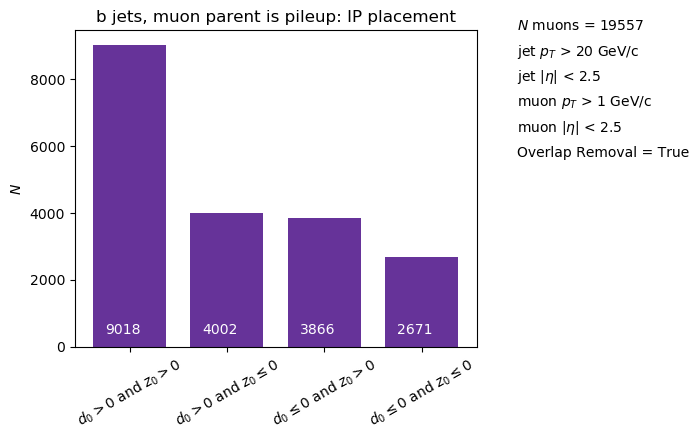

In [14]:
bJetPileupPlots = makePlots(df, "b jets", "pileup")
printPlots(bJetPileupPlots)

Muons from b-jets whose parent is a pion:

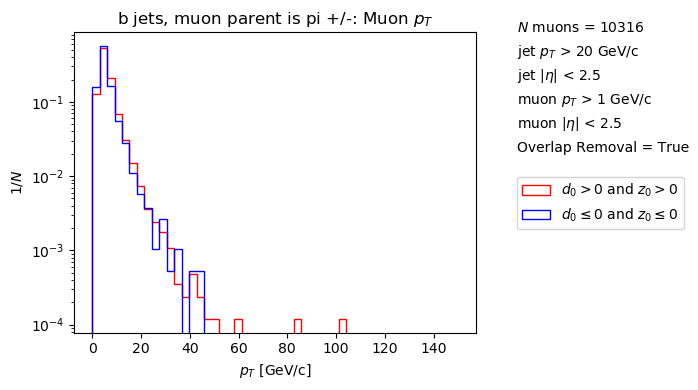

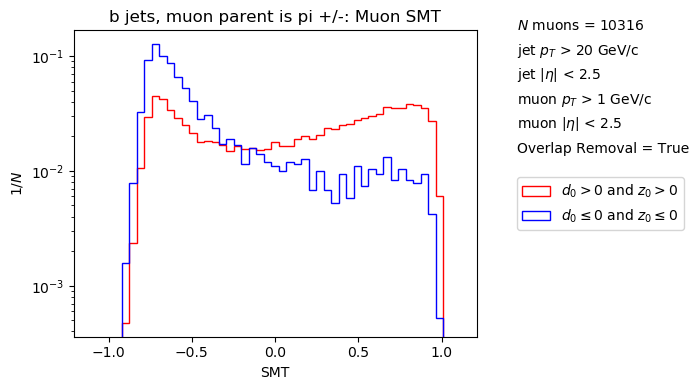

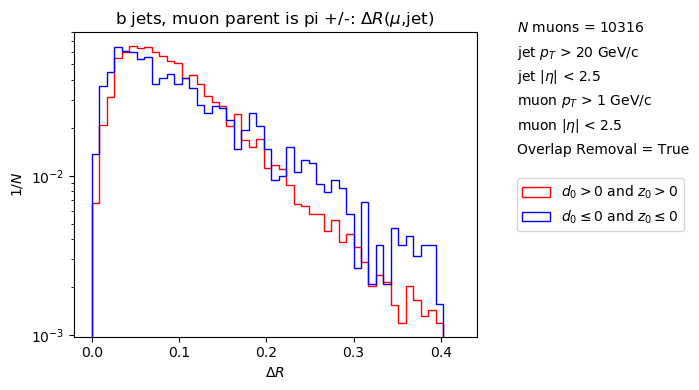

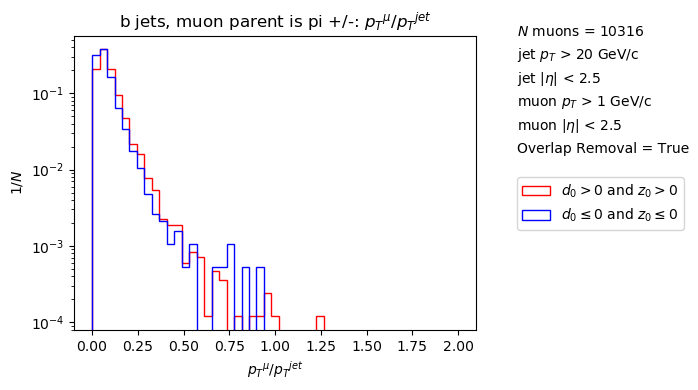

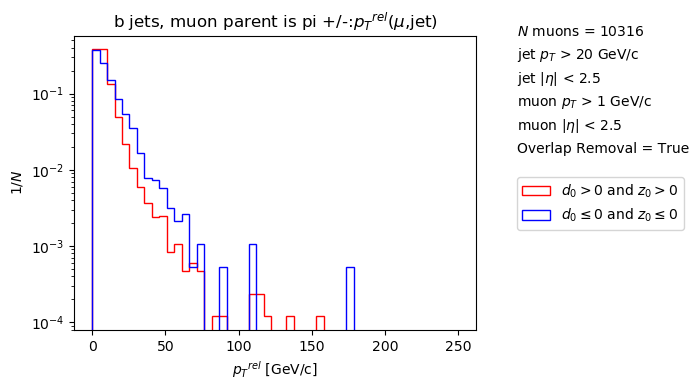

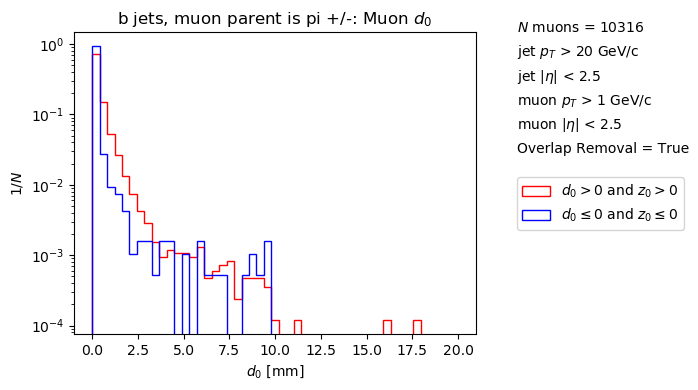

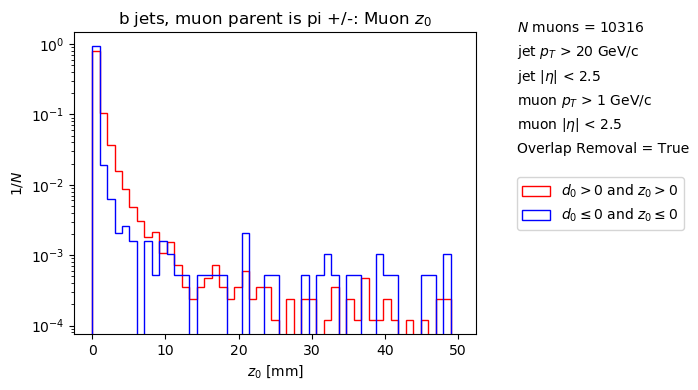

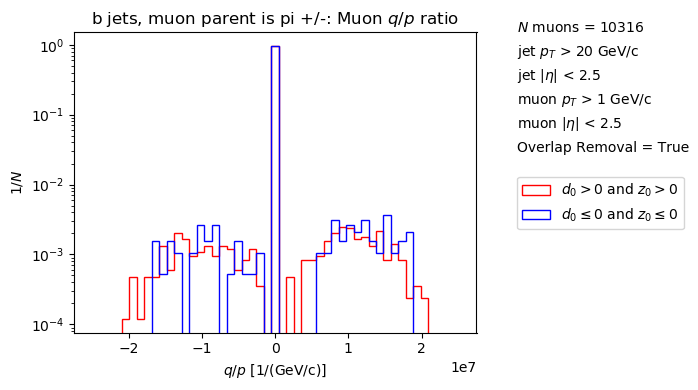

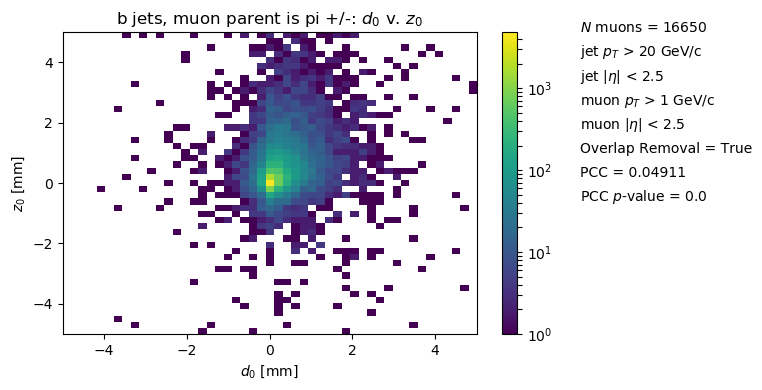

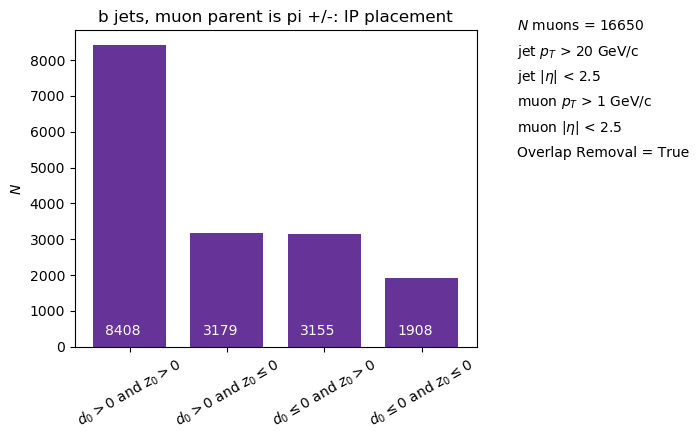

In [15]:
bJetPiPlots = makePlots(df, "b jets", "pi +/-")
printPlots(bJetPiPlots)